In [1]:
!git clone -- https://github.com/paulmunozpauta/ML_course_IUPWARE2025.git

fatal: destination path 'ML_course_IUPWARE2025' already exists and is not an empty directory.


In [1]:
ls

ML_course_IUPWARE2025/  sample_data/


In [2]:
%cd ML_course_IUPWARE2025

/content/ML_course_IUPWARE2025


In [3]:
ls

LICENSE  notebooks/  poetry.lock  pyproject.toml  README.md


In [4]:
# Install Poetry
!pip install poetry
# Disable virtual environment creation (needed for Colab)
!poetry config virtualenvs.create false

In [5]:
!poetry install --no-root

Skipping virtualenv creation, as specified in config file.
Installing dependencies from lock file

Package operations: 0 installs, 2 updates, 0 removals

  - Downgrading packaging (25.0 -> 24.0): Pending...
  - Downgrading packaging (25.0 -> 24.0): Installing...
  - Downgrading packaging (25.0 -> 24.0)
  - Downgrading urllib3 (2.5.0 -> 2.0.7): Pending...
  - Downgrading urllib3 (2.5.0 -> 2.0.7): Installing...
  - Downgrading urllib3 (2.5.0 -> 2.0.7)


In [6]:
import os
folder = os.getcwd()
folder_files= folder+'/notebooks/data/IMERG-ER/Hourly/Global/202301/'
folder_files

'/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/'

In [7]:
import glob
list_of_Files = glob.glob(folder_files + '/*H5')
list_of_Files.sort()

In [8]:
list_of_Files

['/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S003000-E005959.0030.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S010000-E012959.0060.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S013000-E015959.0090.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S020000-E022959.0120.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S023000-E025959.0150.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S030000-E032959.0180.V06C.

In [9]:
item=folder_files+'3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5'
item

'/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5'

In [10]:
import h5py
import numpy as np

data = h5py.File( item, 'r' )
precip = data['/Grid/precipitationCal'][:]
precip = np.flip( precip[0,:,:].transpose(), axis=0 )

In [11]:
precip

array([[    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. , -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       ...,
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9]],
      dtype=float32)

In [12]:
print('Maximum precipitation = ',precip.max(),'mm')
print('Average precipitation = ',precip.mean(),'mm')
print('Minimum precipitation = ',precip.min(),'mm')

Maximum precipitation =  77.89 mm
Average precipitation =  -2579.9229 mm
Minimum precipitation =  -9999.9 mm


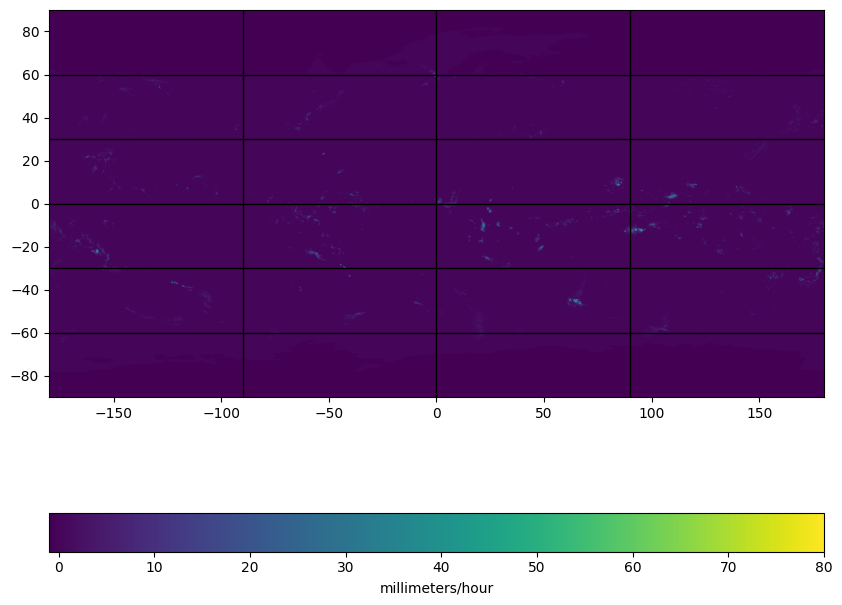

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(precip, vmin=-1, vmax=80, extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label('millimeters/hour')
for lon in np.arange(-90, 90+1, 90):
    plt.plot((lon, lon), (-90, +90), color="black", linewidth=1)
for lat in np.arange(-60, 60+1, 30):
    plt.plot((-180, +180), (lat, lat), color="black", linewidth=1)
plt.show()

In [14]:
precip

array([[    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. , -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       ...,
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9]],
      dtype=float32)

In [22]:
import geopandas as gpd
import xarray as xr
from shapely.geometry import mapping
import rioxarray
import h5py

# Open the HDF5 file again to access lat and lon
with h5py.File( item, 'r' ) as data_file:
    lat_data = data_file['/Grid/lat'][:]
    lon_data = data_file['/Grid/lon'][:]

catchment_shp_1 = gpd.read_file(folder+'/notebooks/shapefiles/Catchment_SA.shp')
data_array = xr.DataArray(data=precip, dims=["lat", "lon"], coords=[lat_data,lon_data])
data_array.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data_array.rio.write_crs("epsg:4326", inplace=True)
data_catchment_1= data_array.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)

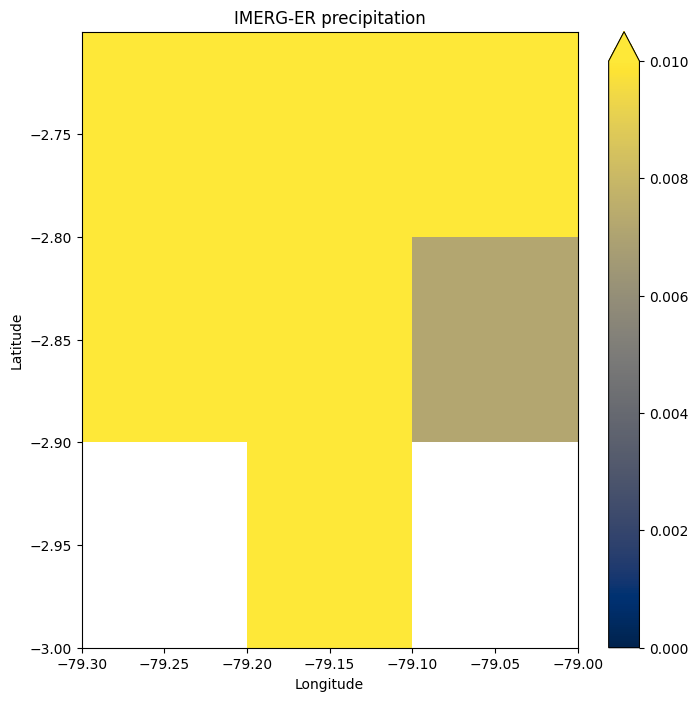

In [23]:
fig = plt.subplots(figsize=(8,8))
data_catchment_1.plot(cmap='cividis',vmin=0,vmax=0.01)
plt.title("IMERG-ER precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [24]:
print('Maximum precipitation = ', np.round(data_catchment_1.max().values,2),'mm')
print('Average precipitation = ', np.round(data_catchment_1.mean().values,2),'mm')
print('Minimum precipitation = ', np.round(data_catchment_1.min().values,2),'mm')

Maximum precipitation =  0.1 mm
Average precipitation =  0.05 mm
Minimum precipitation =  0.01 mm


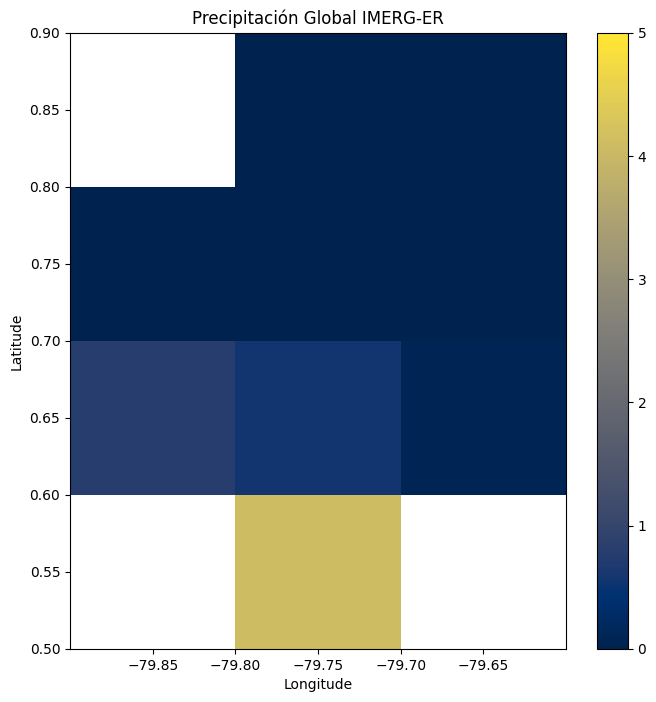

Maximum precipitation =  4.09 mm
Average precipitation =  0.61 mm
Minimum precipitation =  0.0 mm


In [29]:
catchment_shp_2 = gpd.read_file(folder+'/notebooks/shapefiles/Coastal_catchment.geojson')
data_catchment_2 = data_array.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)
fig = plt.subplots(figsize=(8,8))
data_catchment_2.plot(cmap='cividis',vmin=0,vmax=5)
plt.title("Precipitación Global IMERG-ER")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitation = ', np.round(data_catchment_2.max().values,2),'mm')
print('Average precipitation = ', np.round(data_catchment_2.mean().values,2),'mm')
print('Minimum precipitation = ', np.round(data_catchment_2.min().values,2),'mm')

In [30]:
list_of_Files

['/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S000000-E002959.0000.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S003000-E005959.0030.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S010000-E012959.0060.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S013000-E015959.0090.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S020000-E022959.0120.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S023000-E025959.0150.V06C.RT-H5',
 '/content/ML_course_IUPWARE2025/notebooks/data/IMERG-ER/Hourly/Global/202301/3B-HHR-E.MS.MRG.3IMERG.20230131-S030000-E032959.0180.V06C.

In [31]:
data_sum = xr.DataArray(data=np.empty((1800, 3600)), dims=["lat", "lon"])
for index, item in enumerate(list_of_Files):
    print(index+1, 'out of', len(list_of_Files))
    try:
        data = h5py.File(item, 'r')
        precip = data['/Grid/precipitationCal'][:]
        precip[precip < 0] = np.nan
        precip = np.flip(precip[0,:,:].transpose(), axis=0)
        theLats = data['Grid/lat'][:]
        theLons = data['Grid/lon'][:]
        x, y = np.meshgrid(theLons, theLats)

        precip = xr.DataArray(precip, dims=('lat', 'lon'), coords={'lat' : theLats, 'lon' : theLons})

        data_sum += precip

        data.close()

    except (IOError, EOFError) as e:
        continue

1 out of 48
2 out of 48
3 out of 48
4 out of 48
5 out of 48
6 out of 48
7 out of 48
8 out of 48
9 out of 48
10 out of 48
11 out of 48
12 out of 48
13 out of 48
14 out of 48
15 out of 48
16 out of 48
17 out of 48
18 out of 48
19 out of 48
20 out of 48
21 out of 48
22 out of 48
23 out of 48
24 out of 48
25 out of 48
26 out of 48
27 out of 48
28 out of 48
29 out of 48
30 out of 48
31 out of 48
32 out of 48
33 out of 48
34 out of 48
35 out of 48
36 out of 48
37 out of 48
38 out of 48
39 out of 48
40 out of 48
41 out of 48
42 out of 48
43 out of 48
44 out of 48
45 out of 48
46 out of 48
47 out of 48
48 out of 48


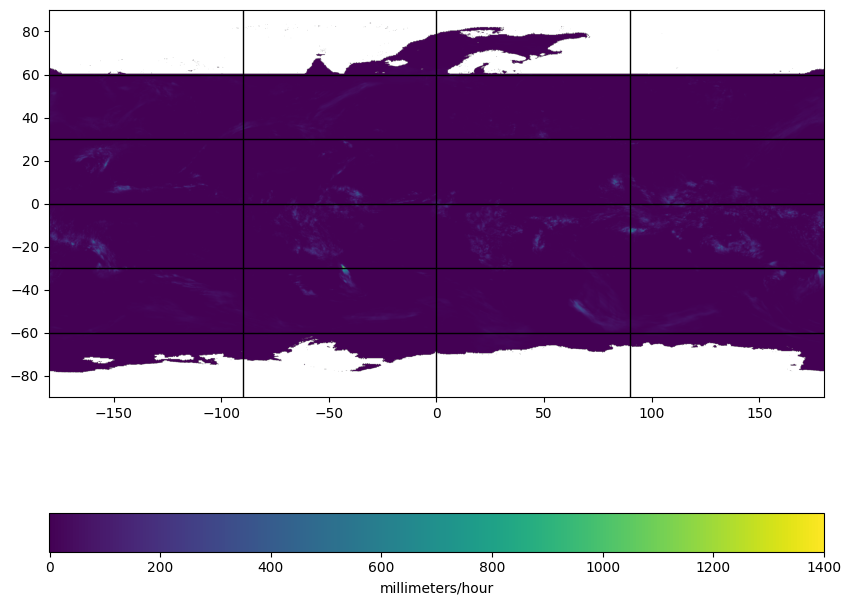

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(data_sum, vmin=-1, vmax=1400, extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label('millimeters/hour')

for lon in np.arange(-90, 90+1, 90):
    plt.plot((lon, lon), (-90, +90), color="black", linewidth=1)
for lat in np.arange(-60, 60+1, 30):
    plt.plot((-180, +180), (lat, lat), color="black", linewidth=1)

plt.show()

In [33]:
data_sum.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data_sum.rio.write_crs("epsg:4326", inplace=True)
data_sum_catchment_1= data_sum.rio.clip(catchment_shp_1.geometry.apply(mapping),catchment_shp_1.crs,all_touched=True)
data_sum_catchment_1

<xarray.DataArray (lat: 3, lon: 3)>
array([[        nan, 15.43885659,         nan],
       [ 8.32326977,  9.09369504,  8.29173989],
       [ 5.1493402 ,  6.15480427,  4.62113877]])
Coordinates:
  * lat          (lat) float32 -2.95 -2.85 -2.75
  * lon          (lon) float32 -79.25 -79.15 -79.05
    spatial_ref  int64 0

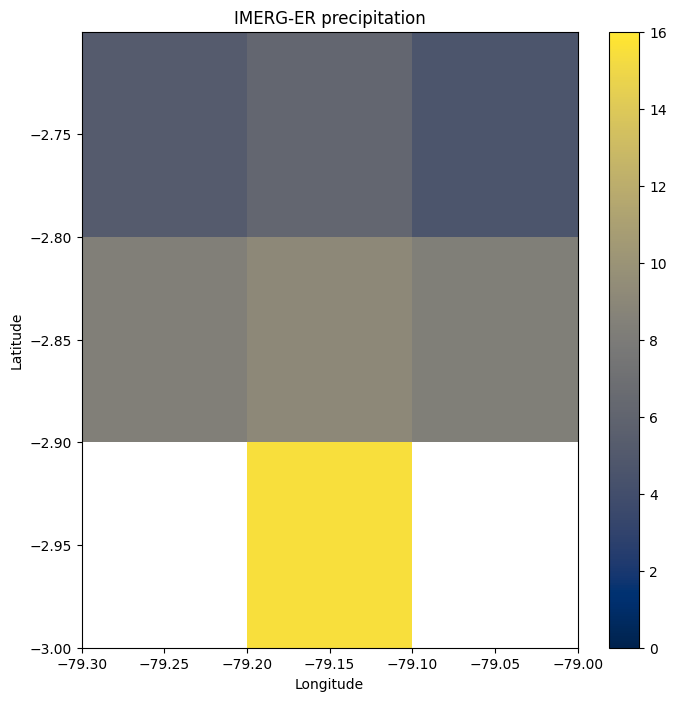

Maximum precipitación =  15.44 mm
Average precipitación =  8.15 mm
Minimum precipitation =  4.62 mm


In [34]:
fig = plt.subplots(figsize=(8,8))
data_sum_catchment_1.plot(cmap='cividis',vmin=0,vmax=16)
plt.title("IMERG-ER precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitación = ', np.round(data_sum_catchment_1.max().values,2),'mm')
print('Average precipitación = ', np.round(data_sum_catchment_1.mean().values,2),'mm')
print('Minimum precipitation = ', np.round(data_sum_catchment_1.min().values,2),'mm')

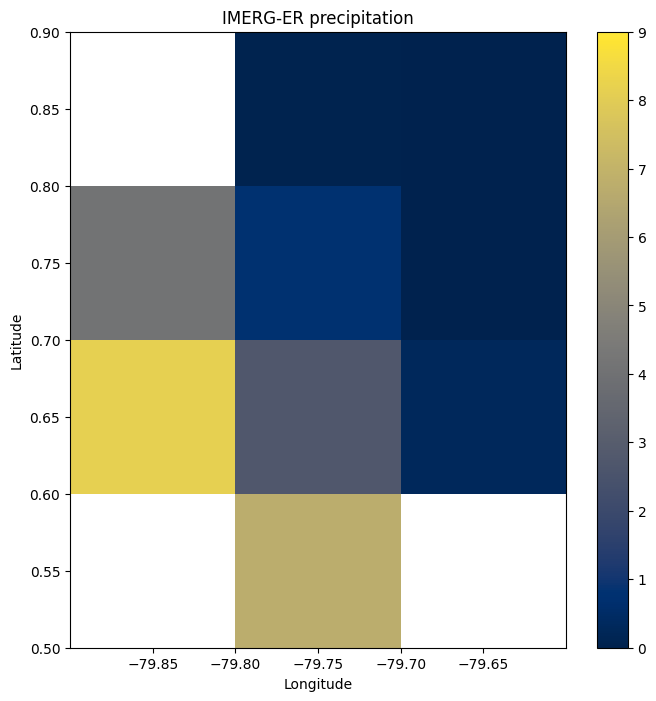

Maximum precipitation =  8.15 mm
Average precipitation =  2.53 mm
Minimum precipitation =  0.0 mm


In [35]:
data_sum = xr.DataArray(data_sum, dims=('lat', 'lon'), coords={'lat' : theLats, 'lon' : theLons})
data_sum.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data_sum.rio.write_crs("epsg:4326", inplace=True)
data_sum_catchment_2= data_sum.rio.clip(catchment_shp_2.geometry.apply(mapping),catchment_shp_2.crs,all_touched=True)
fig = plt.subplots(figsize=(8,8))
data_sum_catchment_2.plot(cmap='cividis',vmin=0,vmax=9)
plt.title("IMERG-ER precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
print('Maximum precipitation = ', np.round(data_sum_catchment_2.max().values,2),'mm')
print('Average precipitation = ', np.round(data_sum_catchment_2.mean().values,2),'mm')
print('Minimum precipitation = ', np.round(data_sum_catchment_2.min().values,2),'mm')

In [37]:
import datetime
import pandas as pd
import xarray as xr
import rioxarray
import h5py
import numpy as np

dataset_list = []  # List to store DataFrames for concatenation later
for index, item in enumerate(list_of_Files):
    print(index + 1, 'out of', len(list_of_Files))
    try:
        with h5py.File(item, 'r') as data:
            precip = data['/Grid/precipitationCal'][:]
            theLats = data['Grid/lat'][:]
            theLons = data['Grid/lon'][:]
    except (IOError, EOFError):
        continue  # Skip file if there's an error
    precip[precip < 0] = np.nan  # Replace negative values with NaN
    precip = np.flip(precip[0, :, :].transpose(), axis=0)  # Flip and transpose
    # Convert to xarray DataArray
    precip = xr.DataArray(precip, dims=('lat', 'lon'), coords={'lat': theLats, 'lon': theLons})
    precip.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    precip.rio.write_crs("epsg:4326", inplace=True)
    # Clip the data using the catchment shape
    precip = precip.rio.clip(catchment_shp_1.geometry.apply(mapping), catchment_shp_1.crs, all_touched=True)
    precip = precip.values.flatten()
    # Extract date from filename
    year = int(item[-40:-36])
    month = int(item[-36:-34])
    day = int(item[-34:-32])
    hour = int(item[-22:-20])
    minute = int(item[-20:-18])
    date = datetime.datetime(year, month, day, hour, minute, 0)
    # Convert data to DataFrame
    data = pd.DataFrame(precip)
    data = data.dropna()
    data = data.T
    data.index = pd.DatetimeIndex([date])  # Set datetime index
    dataset_list.append(data)  # Append DataFrame to list
# Concatenate all DataFrames at the end
if dataset_list:
    dataset = pd.concat(dataset_list)
# Resample dataset, treating NaNs as zeros
dataset = dataset.resample('h', label='right', closed='right').sum().fillna(0)

1 out of 48
2 out of 48
3 out of 48
4 out of 48
5 out of 48
6 out of 48
7 out of 48
8 out of 48
9 out of 48
10 out of 48
11 out of 48
12 out of 48
13 out of 48
14 out of 48
15 out of 48
16 out of 48
17 out of 48
18 out of 48
19 out of 48
20 out of 48
21 out of 48
22 out of 48
23 out of 48
24 out of 48
25 out of 48
26 out of 48
27 out of 48
28 out of 48
29 out of 48
30 out of 48
31 out of 48
32 out of 48
33 out of 48
34 out of 48
35 out of 48
36 out of 48
37 out of 48
38 out of 48
39 out of 48
40 out of 48
41 out of 48
42 out of 48
43 out of 48
44 out of 48
45 out of 48
46 out of 48
47 out of 48
48 out of 48


In [38]:
dataset

,1,3,4,5,6,7,8
2023-01-31 01:00:00,0.148423,0.198615,0.126196,0.014340,0.096081,0.094647,0.022945
2023-01-31 02:00:00,0.074212,0.099307,0.063098,0.007170,0.048040,0.047323,0.011472
2023-01-31 03:00:00,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000
2023-01-31 04:00:00,0.000000,0.000000,0.000000,0.000000,0.016658,0.016658,0.000000
2023-01-31 05:00:00,0.000000,0.000000,0.000000,0.000000,0.009997,0.009997,0.000000
2023-01-31 06:00:00,0.000000,0.000000,0.000000,0.040000,0.180000,0.020000,0.040000
2023-01-31 07:00:00,0.000000,0.010000,0.000000,0.014525,0.085364,0.007263,0.014525
2023-01-31 08:00:00,0.000000,0.016658,0.000000,0.000000,0.033315,0.000000,0.000000
2023-01-31 09:00:00,0.000000,0.009997,0.000000,0.000000,0.019993,0.000000,0.000000
2023-01-31 10:00:00,0.000000,0.006834,0.000000,0.000000,0.013667,0.000000,0.000000


In [39]:
dataset.to_csv(folder_files+"IMERG-ER_UTC_Catchment_1.csv", index=True)

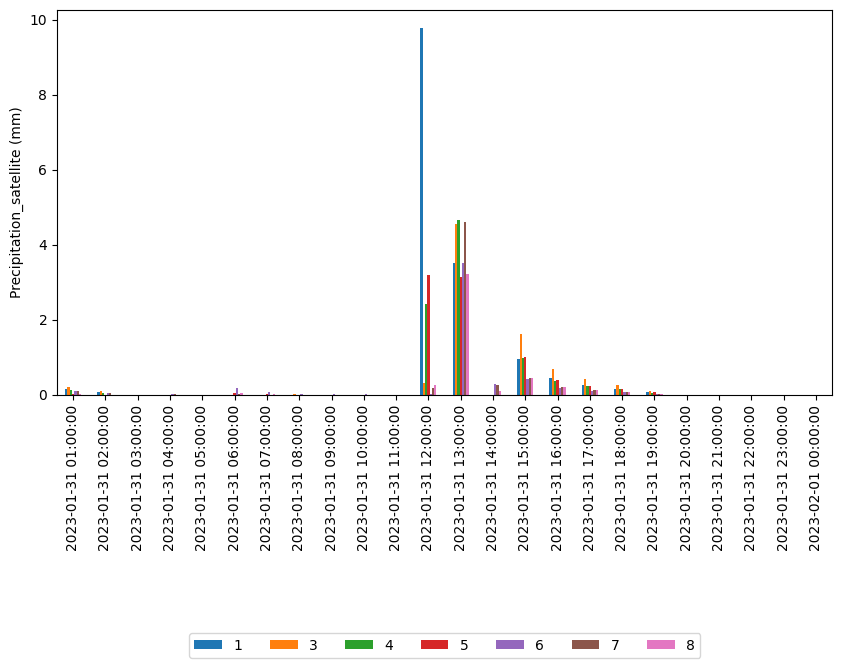

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.plot(kind='bar', ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=7)
plt.show()

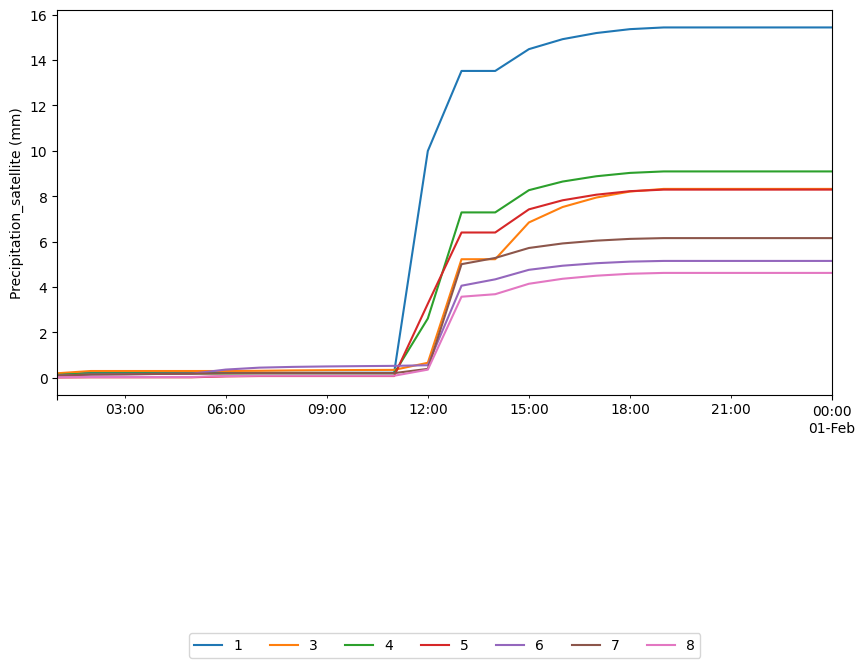

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.cumsum().plot( ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=7)
plt.show()

In [42]:
dataset_list = []  # Store data frames for concatenation later
for index, item in enumerate(list_of_Files):
    print(index + 1, 'out of', len(list_of_Files))
    try:
        with h5py.File(item, 'r') as data:
            precip = data['/Grid/precipitationCal'][:]
    except (IOError, EOFError):
        continue  # Skip to next file if there's an error
    precip[precip < 0] = np.nan  # Replace negative values with NaN
    precip = np.flip(precip[0, :, :].transpose(), axis=0)  # Flip and transpose
    # Convert to xarray DataArray
    precip = xr.DataArray(precip, dims=('lat', 'lon'), coords={'lat': theLats, 'lon': theLons})
    precip.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    precip.rio.write_crs("epsg:4326", inplace=True)
    # Clip the data using the catchment shape
    precip = precip.rio.clip(catchment_shp_2.geometry.apply(mapping), catchment_shp_2.crs, all_touched=True)
    precip = precip.values.flatten()
    # Extract date from filename
    year = int(item[-40:-36])
    month = int(item[-36:-34])
    day = int(item[-34:-32])
    hour = int(item[-22:-20])
    minute = int(item[-20:-18])
    date = datetime.datetime(year, month, day, hour, minute, 0)
    # Convert to DataFrame
    data = pd.DataFrame(precip)
    data = data.dropna()
    data = data.T
    data.index = pd.DatetimeIndex([date])  # Set datetime index
    dataset_list.append(data)  # Append to the list
# Concatenate all DataFrames
if dataset_list:
    dataset = pd.concat(dataset_list)
# Resample dataset
dataset = dataset.resample('h', label='right', closed='right').sum()

1 out of 48
2 out of 48
3 out of 48
4 out of 48
5 out of 48
6 out of 48
7 out of 48
8 out of 48
9 out of 48
10 out of 48
11 out of 48
12 out of 48
13 out of 48
14 out of 48
15 out of 48
16 out of 48
17 out of 48
18 out of 48
19 out of 48
20 out of 48
21 out of 48
22 out of 48
23 out of 48
24 out of 48
25 out of 48
26 out of 48
27 out of 48
28 out of 48
29 out of 48
30 out of 48
31 out of 48
32 out of 48
33 out of 48
34 out of 48
35 out of 48
36 out of 48
37 out of 48
38 out of 48
39 out of 48
40 out of 48
41 out of 48
42 out of 48
43 out of 48
44 out of 48
45 out of 48
46 out of 48
47 out of 48
48 out of 48


In [43]:
dataset

,1,3,4,5,6,7,8,10,11
2023-01-31 01:00:00,6.686399,5.629199,2.3996,0.2956,0.770000,0.2796,0.0316,0.0000,0.0
2023-01-31 02:00:00,0.038400,2.518800,0.3160,0.0000,3.309999,0.4632,0.0000,0.0672,0.0
2023-01-31 03:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 04:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 05:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 06:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 07:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 08:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 09:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0
2023-01-31 10:00:00,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0


In [44]:
dataset.to_csv(folder_files+"IMERG-ER_UTC_Catchment_2.csv", index=True)

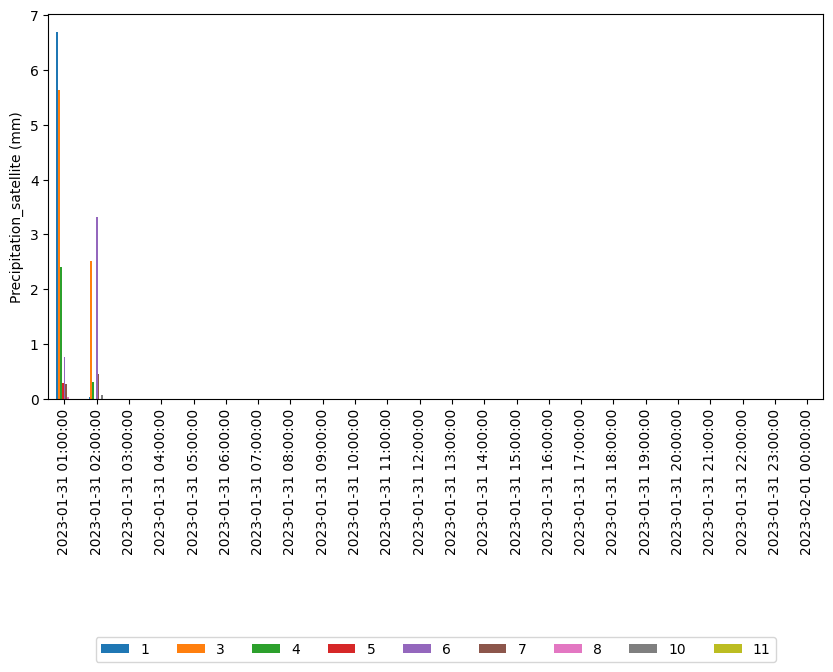

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.plot(kind='bar', ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=9)
plt.show()

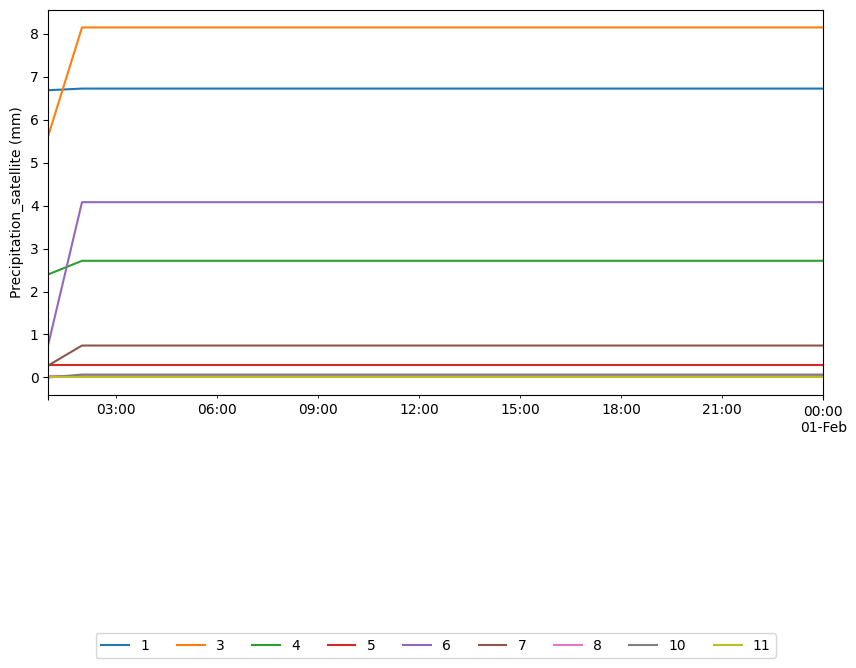

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
dataset.cumsum().plot( ax=ax)
ax.legend(title='Legend Title')
plt.ylabel('Precipitation_satellite (mm)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.6), ncol=9)
plt.show()